In [37]:
import re
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
from pydicom import dcmread
from scipy.ndimage import zoom

In [16]:
df = pd.read_csv('./csvs/final_data.csv')

In [17]:
df.head()

,calcification,internalStructure,lobulation,malignancy,margin,path,sphericity,spiculation,subtlety,texture,final_id,xf,xi,yf,yi,zf,zi
0,6,1,1,3,5,y:LIDC-IDRI/LIDC-IDRI-0039/01-01-2000-49300/30...,4,1,4,5,566.0,157,145,308,296,122,117
1,3,1,1,1,5,y:LIDC-IDRI/LIDC-IDRI-0039/01-01-2000-49300/30...,5,1,4,5,566.0,157,145,308,296,122,117
2,3,1,1,1,5,y:LIDC-IDRI/LIDC-IDRI-0039/01-01-2000-49300/30...,4,1,4,5,566.0,157,145,308,296,122,117
3,3,1,1,1,5,y:LIDC-IDRI/LIDC-IDRI-0039/01-01-2000-49300/30...,5,1,5,5,566.0,157,145,308,296,122,117
4,5,1,1,1,5,y:LIDC-IDRI/LIDC-IDRI-0039/01-01-2000-49300/30...,5,1,4,5,567.0,150,141,272,263,126,121


In [18]:
nodules = df[['path', 'final_id', 'xf', 'xi', 'yf', 'yi', 'zf', 'zi']].drop_duplicates()
nodules.head()

,path,final_id,xf,xi,yf,yi,zf,zi
0,y:LIDC-IDRI/LIDC-IDRI-0039/01-01-2000-49300/30...,566.0,157,145,308,296,122,117
4,y:LIDC-IDRI/LIDC-IDRI-0039/01-01-2000-49300/30...,567.0,150,141,272,263,126,121
8,y:LIDC-IDRI/LIDC-IDRI-0039/01-01-2000-49300/30...,568.0,256,247,303,295,136,131
12,y:LIDC-IDRI/LIDC-IDRI-0039/01-01-2000-49300/30...,569.0,246,234,374,361,167,162
16,y:LIDC-IDRI/LIDC-IDRI-0039/01-01-2000-49300/30...,570.0,214,201,214,202,179,172


In [21]:
nodules['length_x_px'] = nodules.xf - nodules.xi
nodules['length_y_px'] = nodules.yf - nodules.yi
nodules['length_z_px'] = nodules.zf - nodules.zi

In [22]:
nodules.head()

,path,final_id,xf,xi,yf,yi,zf,zi,length_x_px,length_y_px,length_z_px
0,y:LIDC-IDRI/LIDC-IDRI-0039/01-01-2000-49300/30...,566.0,157,145,308,296,122,117,12,12,5
4,y:LIDC-IDRI/LIDC-IDRI-0039/01-01-2000-49300/30...,567.0,150,141,272,263,126,121,9,9,5
8,y:LIDC-IDRI/LIDC-IDRI-0039/01-01-2000-49300/30...,568.0,256,247,303,295,136,131,9,8,5
12,y:LIDC-IDRI/LIDC-IDRI-0039/01-01-2000-49300/30...,569.0,246,234,374,361,167,162,12,13,5
16,y:LIDC-IDRI/LIDC-IDRI-0039/01-01-2000-49300/30...,570.0,214,201,214,202,179,172,13,12,7


In [23]:
paths = nodules.path.unique()

In [12]:
def get_dcm(path, include_metadata=False):
    dcms = [dcmread(path) for path in glob(path+'/*.dcm')]
    dcms.sort(key=lambda x: float(x.ImagePositionPatient[2]))
    
    vol = np.array([(dcm.pixel_array * float(dcm.RescaleSlope)) + float(dcm.RescaleIntercept) for dcm in dcms])
    
    if include_metadata:
        pixel_spacing = np.array(dcms[0].PixelSpacing, dtype=np.float)
        slice_thichness = abs(float(dcms[1].ImagePositionPatient[2]) - float(dcms[0].ImagePositionPatient[2]))
        pixel_spacing = np.concatenate([[slice_thichness], pixel_spacing])
        return pixel_spacing, dcms, vol
    else:
        return dcms, vol

In [24]:
paths[0]

'y:LIDC-IDRI/LIDC-IDRI-0039/01-01-2000-49300/3000517-01463'

In [75]:
np.floor(tt).astype(np.int)

0        585
4        605
8        655
12       810
16       860
20       425
24       385
25       370
26       320
30       535
33       330
36       285
39       270
43       225
45       125
48       145
50       195
53       195
54       775
57       530
61      1405
65      1645
69      1335
71       580
72       835
73      1315
75      1645
79      1715
80       460
82       600
        ... 
6799     415
6801     260
6802     735
6803     260
6804     295
6805     340
6808     275
6812     320
6816     310
6817     365
6818     970
6819     995
6820     915
6821     560
6825    1135
6829     665
6831    1145
6832     190
6836     305
6838     415
6840     450
6842     415
6843     385
6844     460
6845     525
6849     340
6852     545
6854     150
6858     110
6859     120
Name: zi, Length: 2686, dtype: int32

In [ ]:
np.around()

In [76]:
tt

0        585.0
4        605.0
8        655.0
12       810.0
16       860.0
20       425.0
24       385.0
25       370.0
26       320.0
30       535.0
33       330.0
36       285.0
39       270.0
43       225.0
45       125.0
48       145.0
50       195.0
53       195.0
54       775.0
57       530.0
61      1405.0
65      1645.0
69      1335.0
71       580.0
72       835.0
73      1315.0
75      1645.0
79      1715.0
80       460.0
82       600.0
         ...  
6799     415.0
6801     260.0
6802     735.0
6803     260.0
6804     295.0
6805     340.0
6808     275.0
6812     320.0
6816     310.0
6817     365.0
6818     970.0
6819     995.0
6820     915.0
6821     560.0
6825    1135.0
6829     665.0
6831    1145.0
6832     190.0
6836     305.0
6838     415.0
6840     450.0
6842     415.0
6843     385.0
6844     460.0
6845     525.0
6849     340.0
6852     545.0
6854     150.0
6858     110.0
6859     120.0
Name: zi, Length: 2686, dtype: float64

In [78]:
n_shifts = 5
for path in paths[1:2]:
    temp_df = nodules[nodules.path == path]
    lidc_name = 'LIDC-IDRI-' + re.search('LIDC-IDRI-(.+?)/', path).group(1)
    
    pixel_spacing, dcms, vol = get_dcm(path, include_metadata=True)
    vol = zoom(vol, pixel_spacing)
    file = np.load('y:LIDC-IDRI_final_masks/{}.npz'.format(lidc_name))
    mask = file['mask']
    mask = zoom(mask, pixel_spacing, order=0)
    
    nodules.loc[nodules.path == path,'length_z_mm'] = nodules['length_z_px'] * pixel_spacing[0]
    nodules.loc[nodules.path == path,'zi_mm'] = np.floor(nodules['zi'] * pixel_spacing[0]).astype(np.int)
    nodules.loc[nodules.path == path,'zf_mm'] = np.floor(nodules['zf'] * pixel_spacing[0]).astype(np.int)
    
    nodules.loc[nodules.path == path,'length_y_mm'] = nodules['length_y_px'] * pixel_spacing[1]
    nodules.loc[nodules.path == path,'yi_mm'] = np.floor(nodules['yi'] * pixel_spacing[1]).astype(np.int)
    nodules.loc[nodules.path == path,'yf_mm'] = np.floor(nodules['yf'] * pixel_spacing[1]).astype(np.int)
    
    nodules.loc[nodules.path == path,'length_x_mm'] = nodules['length_x_px'] * pixel_spacing[2]
    nodules.loc[nodules.path == path,'xi_mm'] = np.floor(nodules['xi'] * pixel_spacing[2]).astype(np.int)
    nodules.loc[nodules.path == path,'xf_mm'] = np.floor(nodules['xf'] * pixel_spacing[2]).astype(np.int)
    
    """for bbox in temp_df.iterrows():
        c = None
        # recorriendo las cordenadas de los nodulos y almacenado las nuevas coordenadas
        for i in nodules.values:
            z_i = np.random.randint(
                np.maximum(0, (i[0] - 64) + i[3]),
                i[0] - i[3] if ((i[0] - i[3]) + 64) <= vol.shape[0] else vol.shape[0] - 64,
                n_shifts
            )

            y_i = np.random.randint(
                np.maximum(0, (i[1] - 64) + i[3]),
                i[1] - i[3] if ((i[1] - i[3]) + 64) <= vol.shape[1] else vol.shape[1] - 64,
                n_shifts
            )

            x_i = np.random.randint(
                np.maximum(0, (i[2] - 64) + i[3]),
                i[2] - i[3] if ((i[2] - i[3]) + 64) <= vol.shape[2] else vol.shape[2] - 64,
                n_shifts
            )
            start_points = np.array([z_i, y_i, x_i])
            start_points = start_points.T
            if c == None:
                c = start_points
            else:
                c = np.concatenate([c, start_points])"""

In [42]:
nodules[nodules.path == path].drop(columns='path')

,final_id,xf,xi,yf,yi,zf,zi,length_x_px,length_y_px,length_z_px,length_z_mm,zi_mm,zf_mm,length_y_mm,yi_mm,yf_mm,length_x_mm,xi_mm,xf_mm
20,2418.0,143,117,280,255,87,85,26,25,2,10.0,425,435,14.746094,150,165,15.335938,69,84


In [43]:
vol.shape

(645, 302, 302)

In [56]:
from matplotlib.widgets import Slider

In [52]:
vol_temp = vol[425:435, 150:165, 69:84]

<IPython.core.display.Javascript object>


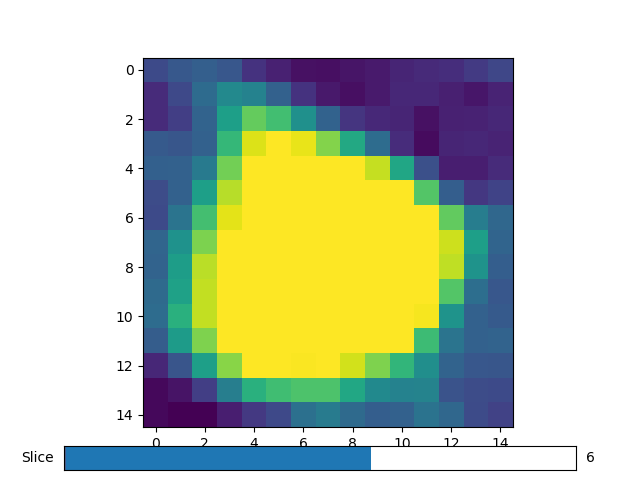

In [64]:
# visualizacion del vol_tempumen
fig, ax = plt.subplots()
p = ax.imshow(vol_temp[0])

axSlider = plt.axes([0.1, 0.02, 0.8, 0.05])
slider = Slider(axSlider, 'Slice', valmin=0, valmax=len(vol_temp), valfmt='%d', valstep=1)

def img_update(val):
    p.set_array(vol_temp[int(slider.val)])

cid2 = slider.on_changed(img_update)

<IPython.core.display.Javascript object>


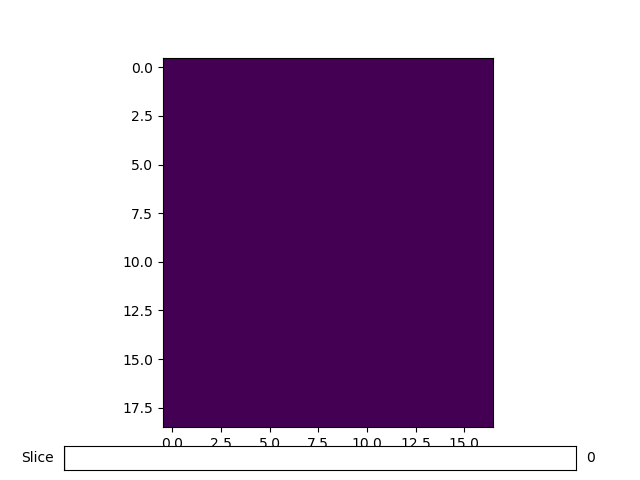

In [68]:
mask_temp = mask[423:437, 148:167, 67:84]
# visualizacion del mask_tempumen
fig, ax = plt.subplots()
p = ax.imshow(mask_temp[0], vmax=1, vmin=0)

axSlider = plt.axes([0.1, 0.02, 0.8, 0.05])
slider = Slider(axSlider, 'Slice', valmin=0, valmax=len(mask_temp), valfmt='%d', valstep=1)

def img_update(val):
    p.set_array(mask_temp[int(slider.val)])

cid2 = slider.on_changed(img_update)

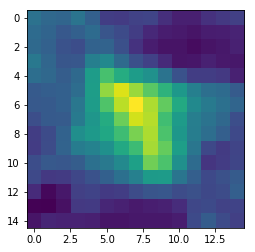

In [50]:
plt.imshow(vol_temp[0])

In [61]:
plt.imshow(mask_temp[1])

In [62]:
mask_temp

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        ...,
        [0, 1, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        ...,
        [0, 1, 1, ..., 

In [14]:
nodulesules[nodules.path == nodules.path.values[0]]

,path,final_id,xf,xi,yf,yi,zf,zi,length_x_px,length_y_px,length_z_px,length_z_mm,length_y_mm,length_x_mm
0,y:LIDC-IDRI/LIDC-IDRI-0039/01-01-2000-49300/30...,566.0,128.175742,118.378870,251.453048,241.656176,152.50,146.25,12,12,5,6.25,9.796872,9.796872
4,y:LIDC-IDRI/LIDC-IDRI-0039/01-01-2000-49300/30...,567.0,122.460900,115.113246,222.062432,214.714778,157.50,151.25,9,9,5,6.25,7.347654,7.347654
8,y:LIDC-IDRI/LIDC-IDRI-0039/01-01-2000-49300/30...,568.0,208.999936,201.652282,247.371018,240.839770,170.00,163.75,9,8,5,6.25,6.531248,7.347654
12,y:LIDC-IDRI/LIDC-IDRI-0039/01-01-2000-49300/30...,569.0,200.835876,191.039004,305.335844,294.722566,208.75,202.50,12,13,5,6.25,10.613278,9.796872
16,y:LIDC-IDRI/LIDC-IDRI-0039/01-01-2000-49300/30...,570.0,174.710884,164.097606,174.710884,164.914012,223.75,215.00,13,12,7,8.75,9.796872,10.613278


In [32]:
np.random.randint(1, 10, 5)

array([1, 9, 1, 1, 7])

In [36]:
a = np.array([[1,2,3], [1,2,3], [1,2,3]])

In [39]:
np.concatenate([[], a, a.T])

ValueError: all the input arrays must have same number of dimensions